In [1]:
import datetime
import json
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pprint
import time
import re
import requests

import sklearn
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
url = "https://api.syosetu.com/novelapi/api/"

In [3]:
# 収集データの決定
data_info_of = 't-s-bg-g-k-gf-gl-nt-ga-l-ir-izk-its-iti-gp-dp-wp-mp-qp-yp-f-imp-r-a-ah-sa-ka'
    
payload_daily = {'out': 'json', 'order': 'dailypoint', 'lim': 100, 'biggenre': '2', 
                 'of': data_info_of}


In [4]:
d = requests.get(url, params=payload_daily)
json_data = d.json()

In [5]:
print(len(json_data))
json_data

101


[{'allcount': 141986},
 {'title': '生産魔法師、休みなし・安月給のブラック騎士団に、生産職のくせに生意気だとクビにされる～代わりが見つからず、金も武器もなくなったから戻ってこいと言うが知らん。こっちは辺境で楽しく生産ライフを送ってるので',
  'story': 'ヨシュアは休みなし、安月給というブラックな騎士団で生産魔法師をしていた。\nそんな過酷な環境の中、更に武具を増産するよう求められ、自分の武器が奴隷狩りに使われることを知り、ヨシュアは騎士団長ロイグに意見した。\nだが、ロイグはそんなヨシュアを生産職のくせに生意気だとクビにする。\n\nヨシュアは仕事を求め南方へ向かうが、道中で鬼人の美少女を救い、原始的な生活を営む彼女たちのため道具や武具を作ることにした。\n\nしかし、ヨシュアもロイグも知らなかった。\nブラックな環境で生産魔法を極めたヨシュアは、実は世界最高の生産魔法師になっていたことを。また、魔法師としても最強の魔力を誇るようになっていたことを。\n\nヨシュアを失った騎士団はやがて何も買えないほどまでに没落する一方、ヨシュアは辺境で楽しい生産ライフを送るのだった。\n\n【11/1\u3000総合日間ランキング一位】',
  'biggenre': 2,
  'genre': 201,
  'keyword': 'R15 残酷な描写あり オリジナル戦記 生産スキル 主人公最強 ハーレム 内政 生産チート 追放 ざまぁ ブラック 勘違い',
  'general_firstup': '2020-10-27 19:06:53',
  'general_lastup': '2020-11-04 19:11:07',
  'noveltype': 1,
  'general_all_no': 35,
  'length': 75892,
  'isr15': 1,
  'iszankoku': 1,
  'istensei': 0,
  'istenni': 0,
  'global_point': 36102,
  'daily_point': 4806,
  'weekly_point': 34510,
  'monthly_point': 35326,
  'quarter_point': 35326,
  'yea

In [6]:
datas = []
datas.extend(json_data[1:])

columns = []
for c in datas[0]:
    columns.append(c)

In [7]:
bf_df = pd.DataFrame(datas, columns=columns)

In [8]:
df = bf_df.copy()

In [9]:
title_length = []
keyword_length = []
story_length = []

In [10]:
for x, y, z in zip(df.title, df.keyword, df.story):
    try:
        title_length.append(len(x))
        keyword_length.append(len(y))
        story_length.append(len(z))
    except TypeError:
        continue

In [11]:
df.title = title_length
df.keyword = keyword_length
df.story = story_length

In [12]:
df

,title,story,biggenre,genre,keyword,general_firstup,general_lastup,noveltype,general_all_no,length,...,monthly_point,quarter_point,yearly_point,fav_novel_cnt,impression_cnt,review_cnt,all_point,all_hyoka_cnt,sasie_cnt,kaiwaritu
0,100,376,2,201,61,2020-10-27 19:06:53,2020-11-04 19:11:07,1,35,75892,...,35326,35326,24184,8804,0,0,18494,2038,0,37
1,78,600,2,201,68,2020-10-29 11:00:00,2020-11-04 20:39:49,1,16,41033,...,12862,12862,6094,3441,24,0,6680,726,0,28
2,100,578,2,201,64,2020-10-28 23:04:56,2020-11-05 07:00:00,1,18,25389,...,23644,23644,16460,6583,0,1,10856,1181,0,45
3,99,461,2,201,50,2020-10-11 16:12:17,2020-11-05 08:00:00,1,29,96821,...,131336,131336,126158,31303,0,0,69094,7599,0,29
4,98,592,2,201,81,2020-10-07 13:09:18,2020-11-04 12:15:35,1,44,46474,...,137982,137982,132960,32492,218,1,73198,8152,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13,194,2,201,26,2013-02-20 00:36:17,2020-07-04 00:00:12,1,304,2043550,...,7470,26754,118637,250866,13504,100,147726,15348,5,14
96,38,320,2,202,73,2020-09-16 00:00:00,2020-10-25 21:00:00,1,49,74691,...,15540,36734,36462,8030,0,0,20692,2294,0,52
97,40,261,2,201,44,2020-02-18 20:16:49,2020-11-04 19:00:00,1,57,146512,...,4244,5144,124430,25753,0,0,73434,7942,0,47
98,52,412,2,201,57,2018-05-16 11:17:24,2020-10-30 18:00:00,1,194,1148190,...,3756,14222,63943,67749,1858,3,64386,6932,0,48


In [13]:
now_date = datetime.datetime.now()

In [14]:
now_date

datetime.datetime(2020, 11, 5, 11, 44, 9, 228755)

In [15]:
def difference_type_search(self):
    date_pattern = r'....-..-.. ..:..:..'
    dt = []
    st = []
    
    for index, d in enumerate(self):
        if type(d) == str:
            if re.search(date_pattern, d) != None:
                for i, d in enumerate(df):
                    if i == index:
                        dt.append(d)
            else:
                for i, d in enumerate(df):
                    if i == index:
                        st.append(d)
    return dt, st

In [16]:
def df_type_change(self):
    dts_d = difference_type_search(df.iloc[0])[0]
    dts_s = difference_type_search(df.iloc[0])[1]
    
    for d in dts_d:
        difference_date = []
        for t in df[d]:
            df_date = datetime.datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
            day_sa = now_date - df_date
            difference_date.append(day_sa.days)
        df[d] = difference_date
    
    for d in dts_s:
        length = []
        for i in df[d]:
            length.append(len(i))
        df[d] = length

In [17]:
difference_type_search(df.iloc[0])

(['general_firstup', 'general_lastup'], [])

In [18]:
df_type_change(df)

In [19]:
df

,title,story,biggenre,genre,keyword,general_firstup,general_lastup,noveltype,general_all_no,length,...,monthly_point,quarter_point,yearly_point,fav_novel_cnt,impression_cnt,review_cnt,all_point,all_hyoka_cnt,sasie_cnt,kaiwaritu
0,100,376,2,201,61,8,0,1,35,75892,...,35326,35326,24184,8804,0,0,18494,2038,0,37
1,78,600,2,201,68,7,0,1,16,41033,...,12862,12862,6094,3441,24,0,6680,726,0,28
2,100,578,2,201,64,7,0,1,18,25389,...,23644,23644,16460,6583,0,1,10856,1181,0,45
3,99,461,2,201,50,24,0,1,29,96821,...,131336,131336,126158,31303,0,0,69094,7599,0,29
4,98,592,2,201,81,28,0,1,44,46474,...,137982,137982,132960,32492,218,1,73198,8152,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13,194,2,201,26,2815,124,1,304,2043550,...,7470,26754,118637,250866,13504,100,147726,15348,5,14
96,38,320,2,202,73,50,10,1,49,74691,...,15540,36734,36462,8030,0,0,20692,2294,0,52
97,40,261,2,201,44,260,0,1,57,146512,...,4244,5144,124430,25753,0,0,73434,7942,0,47
98,52,412,2,201,57,904,5,1,194,1148190,...,3756,14222,63943,67749,1858,3,64386,6932,0,48


In [20]:
# .max() 　最大値
# .min()　最小値
# .mode() 　最頻値
# .mean() 　平均値
# .median() 　中央値
# .std() 　標準偏差
# .count() 　件数
# .corr()　相関係数（列間のデータの相関関係を数値化、主にテーブル全体に対して使う。）
# .unique()　カテゴリカルデータの項目を表示
# .value_counts() 　項目別数量

In [21]:
# numpy.sqrt(x)	配列xの平方根を求めます。
# numpy.cbrt(x)	配列xの立方根（三乗根）を求めます。
# numpy.square(x)	配列xの二乗を求めます。

In [22]:
X = df.daily_point
Y = df.yearly_point

In [23]:
X = np.array([[value, 1] for value in X])

In [24]:
model = LinearRegression()
model.fit(X, Y)
print('切片:', model.intercept_)
print('傾き:', model.coef_)

切片: 80094.7430835776
傾き: [-8.5520117  0.       ]


In [25]:
a,b = np.linalg.lstsq(X, Y)[0]

<ipython-input-25-574e2b107552>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a,b = np.linalg.lstsq(X, Y)[0]


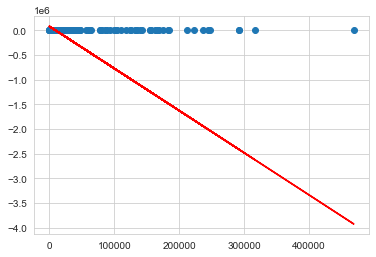

In [26]:
plt.plot(df.yearly_point, df.kaiwaritu, 'o')

x = df.yearly_point
plt.plot(x, a*x+b, 'r')

In [27]:
lreg = LinearRegression()

In [28]:
X_multi = df.drop('daily_point', 1)

In [29]:
X_multi.shape

(100, 26)

In [30]:
Y_target = df.daily_point

In [31]:
lreg.fit(X_multi, Y_target)

LinearRegression()

In [32]:
lreg.intercept_

35264.46434014022

In [33]:
len(lreg.coef_)

26

In [34]:
coeff_df = DataFrame(df.columns)

In [35]:
coeff_df.columns = ['Featers']

In [36]:
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

In [37]:
coeff_df

,Featers,Coefficient Estimate
0,title,1.104932e+00
1,story,-3.229198e-01
2,biggenre,1.294041e-09
3,genre,-1.689737e+02
4,keyword,-8.936202e-01
5,general_firstup,-2.195028e-01
6,general_lastup,7.885880e-02
7,noveltype,-6.608568e+02
8,general_all_no,-4.732573e-01
9,length,2.192307e-04


In [38]:
X_train, X_test,Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,df.daily_point)

In [39]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape) 

(75, 26) (25, 26) (75,) (25,)


In [40]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression()

In [41]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [42]:
print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_train - pred_train) ** 2)))
    
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_test - pred_test) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝44123.25
X_testを使ったモデルの平均二乗誤差＝248412.41


Text(0.5, 1.0, 'Residual Plots')

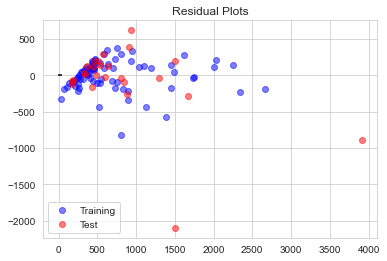

In [43]:
# 学習用のデータの残差プロットです。
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用のデータの残差プロットです。
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')